In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_ventas = pd.read_csv('/content/Sales_data.csv',sep=';')
df_ventas

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,1/01/2022,S001,P0001,Electronics,North,195.0,102.0,252.0,72.72,5.0,Snowy,0,85.73,Winter,0,115
1,1/01/2022,S001,P0002,Clothing,North,117.0,117.0,249.0,80.16,15.0,Snowy,1,92.02,Winter,0,229
2,1/01/2022,S001,P0003,Clothing,North,247.0,114.0,612.0,62.94,10.0,Snowy,1,60.08,Winter,0,157
3,1/01/2022,SO01,P0004,Electronics,North,139.0,45.0,102.0,87.63,10.0,Snowy,0,85.19,Winter,0,52
4,1/01/2022,S001,P005,Groceries,North,152.0,65.0,271.0,54.41,NaN,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,30/01/2024,SI05,P0016,Toys,North,233.0,63.0,NaN,29.80,5.0,Snowy,0,32.23,Winter,0,64
75996,30/01/2024,SI05,P0017,Toys,North,137.0,115.0,141.0,42.92,5.0,Snowy,0,40.73,Winter,0,137
75997,30/01/2024,SI05,P0018,Clothing,North,197.0,44.0,NaN,17.81,10.0,Snowy,0,19.41,Winter,0,68
75998,30/01/2024,SI05,P0019,Furniture,North,125.0,58.0,NaN,151.72,NaN,Snowy,0,143.71,Winter,0,84


In [2]:
#Renombrar columnas de la tabla
df_ventas.rename(columns={'Date' : 'Fecha', 'Store ID': 'ID_Tienda', 'Product ID': 'ID_Producto', 'Category': 'Categoria',
                                      'Region' : 'Region', 'Inventory Level' : 'Inventario', 'Units Sold' : 'Unidades_Vendidas',
                                       'Units Ordered' : 'Unidades_Pedidas' , 'Price' : 'Precio', 'Discount' : 'Descuento',
                                        'Weather Condition' : 'Cond_Meteor', 'Promotion' : 'Promocion',
                                        'Competitor Pricing' : 'Precio_competencia', 'Seasonality' : 'Estacionalidad',
                                        'Epidemic' : 'Epidemia', 'Demand' : 'Demanda'}, inplace=True)
df_ventas.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fecha               76000 non-null  object 
 1   ID_Tienda           76000 non-null  object 
 2   ID_Producto         76000 non-null  object 
 3   Categoria           76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventario          75594 non-null  float64
 6   Unidades_Vendidas   75594 non-null  float64
 7   Unidades_Pedidas    28893 non-null  float64
 8   Precio              76000 non-null  float64
 9   Descuento           58874 non-null  float64
 10  Cond_Meteor         76000 non-null  object 
 11  Promocion           76000 non-null  int64  
 12  Precio_competencia  76000 non-null  float64
 13  Estacionalidad      76000 non-null  object 
 14  Epidemia            76000 non-null  int64  
 15  Demanda             76000 non-null  int64  
dtypes: f

In [3]:
#cambiar formato a tipo fecha
df_ventas['Fecha'] = pd.to_datetime(df_ventas['Fecha'], dayfirst=True)

#corregir datos de columna ID_Tienda
df_ventas['ID_Tienda'] = df_ventas['ID_Tienda'].replace('SO01', 'S001')
df_ventas['ID_Tienda'] = df_ventas['ID_Tienda'].replace('SI05', 'S005')
df_ventas['ID_Tienda'] = df_ventas['ID_Tienda'].replace('SO003', 'S003')
df_ventas['ID_Tienda'] = df_ventas['ID_Tienda'].replace('S0003', 'S003')



#Corregir datos de columna ID_Producto
df_ventas['ID_Producto'] = df_ventas['ID_Producto'].replace('P0007-', 'P0007')
df_ventas['ID_Producto'] = df_ventas['ID_Producto'].replace('P005', 'P0005')
df_ventas['ID_Producto'] = df_ventas['ID_Producto'].replace('PO004', 'P0004')
df_ventas

,Fecha,ID_Tienda,ID_Producto,Categoria,Region,Inventario,Unidades_Vendidas,Unidades_Pedidas,Precio,Descuento,Cond_Meteor,Promocion,Precio_competencia,Estacionalidad,Epidemia,Demanda
0,2022-01-01,S001,P0001,Electronics,North,195.0,102.0,252.0,72.72,5.0,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117.0,117.0,249.0,80.16,15.0,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247.0,114.0,612.0,62.94,10.0,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139.0,45.0,102.0,87.63,10.0,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152.0,65.0,271.0,54.41,NaN,Snowy,0,51.63,Winter,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Toys,North,233.0,63.0,NaN,29.80,5.0,Snowy,0,32.23,Winter,0,64
75996,2024-01-30,S005,P0017,Toys,North,137.0,115.0,141.0,42.92,5.0,Snowy,0,40.73,Winter,0,137
75997,2024-01-30,S005,P0018,Clothing,North,197.0,44.0,NaN,17.81,10.0,Snowy,0,19.41,Winter,0,68
75998,2024-01-30,S005,P0019,Furniture,North,125.0,58.0,NaN,151.72,NaN,Snowy,0,143.71,Winter,0,84


In [4]:
#Renombrar datos de la Columna Categoria
df_ventas['Categoria'] = df_ventas['Categoria'].replace('Electronics', 'Electronicos')
df_ventas['Categoria'] = df_ventas['Categoria'].replace('Clothing', 'Ropa')
df_ventas['Categoria'] = df_ventas['Categoria'].replace('Furniture', 'Muebles')
df_ventas['Categoria'] = df_ventas['Categoria'].replace('Toys', 'Juguetes')
df_ventas['Categoria'] = df_ventas['Categoria'].replace('Groceries', 'Comestibles')

#Renombrar datos de la columna Region
df_ventas['Region'] = df_ventas['Region'].replace('North', 'Norte')
df_ventas['Region'] = df_ventas['Region'].replace('South', 'Sur')
df_ventas['Region'] = df_ventas['Region'].replace('East', 'Este')
df_ventas['Region'] = df_ventas['Region'].replace('West', 'Oeste')

#Renombrar datos de la columna Cond_Meteor
df_ventas['Cond_Meteor'] = df_ventas['Cond_Meteor'].replace('Sunny', 'Soleado')
df_ventas['Cond_Meteor'] = df_ventas['Cond_Meteor'].replace('Cloudy', 'Nublado')
df_ventas['Cond_Meteor'] = df_ventas['Cond_Meteor'].replace('Rainy', 'Lluvioso')
df_ventas['Cond_Meteor'] = df_ventas['Cond_Meteor'].replace('Snowy', 'Nieve')

#Renombrar datos de la columna Estacionalidad
df_ventas['Estacionalidad'] = df_ventas['Estacionalidad'].replace('Winter', 'Invierno')
df_ventas['Estacionalidad'] = df_ventas['Estacionalidad'].replace('Summer', 'Verano')
df_ventas['Estacionalidad'] = df_ventas['Estacionalidad'].replace('Spring', 'Primavera')
df_ventas['Estacionalidad'] = df_ventas['Estacionalidad'].replace('Autumn', 'Otoño')

#Reemplazar datos de la columna Promocion
df_ventas['Promocion'] = df_ventas['Promocion'].replace(1, 'Si')
df_ventas['Promocion'] = df_ventas['Promocion'].replace(0, 'No')

#Reemplazar datos de la columna Epidemia
df_ventas['Epidemia'] = df_ventas['Epidemia'].replace(1, 'Si')
df_ventas['Epidemia'] = df_ventas['Epidemia'].replace(0, 'No')

#Reemplazar valor NaN por ceros(0)
df_ventas['Inventario'] = df_ventas['Inventario'].fillna(0).astype(int)
df_ventas['Unidades_Vendidas'] = df_ventas['Unidades_Vendidas'].fillna(0).astype(int)
df_ventas['Unidades_Pedidas'] = df_ventas['Unidades_Pedidas'].fillna(0).astype(int)
df_ventas['Descuento'] = df_ventas['Descuento'].fillna(0).astype(int)
df_ventas


,Fecha,ID_Tienda,ID_Producto,Categoria,Region,Inventario,Unidades_Vendidas,Unidades_Pedidas,Precio,Descuento,Cond_Meteor,Promocion,Precio_competencia,Estacionalidad,Epidemia,Demanda
0,2022-01-01,S001,P0001,Electronicos,Norte,195,102,252,72.72,5,Nieve,No,85.73,Invierno,No,115
1,2022-01-01,S001,P0002,Ropa,Norte,117,117,249,80.16,15,Nieve,Si,92.02,Invierno,No,229
2,2022-01-01,S001,P0003,Ropa,Norte,247,114,612,62.94,10,Nieve,Si,60.08,Invierno,No,157
3,2022-01-01,S001,P0004,Electronicos,Norte,139,45,102,87.63,10,Nieve,No,85.19,Invierno,No,52
4,2022-01-01,S001,P0005,Comestibles,Norte,152,65,271,54.41,0,Nieve,No,51.63,Invierno,No,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Juguetes,Norte,233,63,0,29.80,5,Nieve,No,32.23,Invierno,No,64
75996,2024-01-30,S005,P0017,Juguetes,Norte,137,115,141,42.92,5,Nieve,No,40.73,Invierno,No,137
75997,2024-01-30,S005,P0018,Ropa,Norte,197,44,0,17.81,10,Nieve,No,19.41,Invierno,No,68
75998,2024-01-30,S005,P0019,Muebles,Norte,125,58,0,151.72,0,Nieve,No,143.71,Invierno,No,84


In [5]:
#Corregir error de la columna Descuento y Promoción Si tiene descuento entonces promocion debe ser Si
df_ventas.loc[df_ventas['Descuento'] > 0, 'Promocion'] = 'Si'
df_ventas

,Fecha,ID_Tienda,ID_Producto,Categoria,Region,Inventario,Unidades_Vendidas,Unidades_Pedidas,Precio,Descuento,Cond_Meteor,Promocion,Precio_competencia,Estacionalidad,Epidemia,Demanda
0,2022-01-01,S001,P0001,Electronicos,Norte,195,102,252,72.72,5,Nieve,Si,85.73,Invierno,No,115
1,2022-01-01,S001,P0002,Ropa,Norte,117,117,249,80.16,15,Nieve,Si,92.02,Invierno,No,229
2,2022-01-01,S001,P0003,Ropa,Norte,247,114,612,62.94,10,Nieve,Si,60.08,Invierno,No,157
3,2022-01-01,S001,P0004,Electronicos,Norte,139,45,102,87.63,10,Nieve,Si,85.19,Invierno,No,52
4,2022-01-01,S001,P0005,Comestibles,Norte,152,65,271,54.41,0,Nieve,No,51.63,Invierno,No,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Juguetes,Norte,233,63,0,29.80,5,Nieve,Si,32.23,Invierno,No,64
75996,2024-01-30,S005,P0017,Juguetes,Norte,137,115,141,42.92,5,Nieve,Si,40.73,Invierno,No,137
75997,2024-01-30,S005,P0018,Ropa,Norte,197,44,0,17.81,10,Nieve,Si,19.41,Invierno,No,68
75998,2024-01-30,S005,P0019,Muebles,Norte,125,58,0,151.72,0,Nieve,No,143.71,Invierno,No,84


In [6]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Fecha               76000 non-null  datetime64[ns]
 1   ID_Tienda           76000 non-null  object        
 2   ID_Producto         76000 non-null  object        
 3   Categoria           76000 non-null  object        
 4   Region              76000 non-null  object        
 5   Inventario          76000 non-null  int64         
 6   Unidades_Vendidas   76000 non-null  int64         
 7   Unidades_Pedidas    76000 non-null  int64         
 8   Precio              76000 non-null  float64       
 9   Descuento           76000 non-null  int64         
 10  Cond_Meteor         76000 non-null  object        
 11  Promocion           76000 non-null  object        
 12  Precio_competencia  76000 non-null  float64       
 13  Estacionalidad      76000 non-null  object    

In [7]:
#guardar Base en un nuevo Excel
df_ventas.to_excel('Data_Ventas.xlsx', index=False)


In [8]:
df = pd.read_excel('/content/Data_Ventas.xlsx')
df

,Fecha,ID_Tienda,ID_Producto,Categoria,Region,Inventario,Unidades_Vendidas,Unidades_Pedidas,Precio,Descuento,Cond_Meteor,Promocion,Precio_competencia,Estacionalidad,Epidemia,Demanda
0,2022-01-01,S001,P0001,Electronicos,Norte,195,102,252,72.72,5,Nieve,Si,85.73,Invierno,No,115
1,2022-01-01,S001,P0002,Ropa,Norte,117,117,249,80.16,15,Nieve,Si,92.02,Invierno,No,229
2,2022-01-01,S001,P0003,Ropa,Norte,247,114,612,62.94,10,Nieve,Si,60.08,Invierno,No,157
3,2022-01-01,S001,P0004,Electronicos,Norte,139,45,102,87.63,10,Nieve,Si,85.19,Invierno,No,52
4,2022-01-01,S001,P0005,Comestibles,Norte,152,65,271,54.41,0,Nieve,No,51.63,Invierno,No,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,2024-01-30,S005,P0016,Juguetes,Norte,233,63,0,29.80,5,Nieve,Si,32.23,Invierno,No,64
75996,2024-01-30,S005,P0017,Juguetes,Norte,137,115,141,42.92,5,Nieve,Si,40.73,Invierno,No,137
75997,2024-01-30,S005,P0018,Ropa,Norte,197,44,0,17.81,10,Nieve,Si,19.41,Invierno,No,68
75998,2024-01-30,S005,P0019,Muebles,Norte,125,58,0,151.72,0,Nieve,No,143.71,Invierno,No,84


In [9]:
#estadisticas de Resumen
media = df.mean(numeric_only=True).round(2)
mediana = df.median(numeric_only=True).round(2)
moda = df.mode(numeric_only=True).iloc[0]

print('\n La media para los datos son: ')
print(media)
print('\n La mediana para los datos son: ')
print(mediana)
print('\n La moda para los datos son: ')
print(moda)



 La media para los datos son: 
Inventario            301.06
Unidades_Vendidas      88.83
Unidades_Pedidas       89.09
Precio                 67.73
Descuento               9.09
Precio_competencia     69.45
Demanda               104.32
dtype: float64

 La mediana para los datos son: 
Inventario            227.0
Unidades_Vendidas      84.0
Unidades_Pedidas        0.0
Precio                 64.5
Descuento              10.0
Precio_competencia     65.7
Demanda               100.0
dtype: float64

 La moda para los datos son: 
Inventario             0.00
Unidades_Vendidas     72.00
Unidades_Pedidas       0.00
Precio                23.34
Descuento             10.00
Precio_competencia    27.02
Demanda               88.00
Name: 0, dtype: float64


In [10]:
desv_estandar = df.std(numeric_only=True).round(2)
varianza = df.var(numeric_only=True).round(2)

print('\n La desviacion estandar para los datos son: ')
print(desv_estandar)
print('\n La varianza para los datos son: ')
print(varianza)



 La desviacion estandar para los datos son: 
Inventario            226.51
Unidades_Vendidas      43.99
Unidades_Pedidas      162.40
Precio                 39.38
Descuento               7.48
Precio_competencia     40.94
Demanda                46.96
dtype: float64

 La varianza para los datos son: 
Inventario            51306.85
Unidades_Vendidas      1935.52
Unidades_Pedidas      26375.26
Precio                 1550.62
Descuento                55.89
Precio_competencia     1676.40
Demanda                2205.69
dtype: float64


In [11]:
min = df.min(numeric_only=True).round(2)
max = df.max(numeric_only=True).round(2)

print('\n El valor minimo para los datos son: ')
print(min)
print('\n El valor maximo para los datos son: ')
print(max)


 El valor minimo para los datos son: 
Inventario            0.00
Unidades_Vendidas     0.00
Unidades_Pedidas      0.00
Precio                4.74
Descuento             0.00
Precio_competencia    4.29
Demanda               4.00
dtype: float64

 El valor maximo para los datos son: 
Inventario            2267.00
Unidades_Vendidas      426.00
Unidades_Pedidas      1616.00
Precio                 228.03
Descuento               25.00
Precio_competencia     261.22
Demanda                430.00
dtype: float64


In [12]:
#agrupar por categoria y region y sumar las unidades vendidas
df.groupby(['Categoria', 'Region'])['Unidades_Vendidas'].sum()

Categoria     Region
Comestibles   Este       695831
              Norte     1254531
              Oeste      556920
              Sur        620053
Electronicos  Este       208763
              Norte      302787
              Oeste       56696
              Sur        189089
Juguetes      Este       179803
              Norte      469896
              Sur        184980
Muebles       Este       147374
              Norte      344705
              Oeste      339751
              Sur         48824
Ropa          Este       143842
              Norte      309027
              Oeste      354824
              Sur        343180
Name: Unidades_Vendidas, dtype: int64

In [13]:
#categoria mas vendida
df.groupby('Categoria')['Unidades_Pedidas'].sum()


,Unidades_Pedidas
Categoria,
Comestibles,3138243
Electronicos,760070
Juguetes,835810
Muebles,882801
Ropa,1153965


**Deteccion de Variables atípicas**

In [15]:
# Cargar datos
df = pd.read_excel("/content/Data_Ventas.xlsx")

# Seleccionar solo columnas numéricas
columnas_numericas = df.select_dtypes(include='number').columns

# Diccionario para guardar el número de outliers por columna
outliers = {}

# Detectar outliers por el método IQR
for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    cantidad_outliers = ((df[col] < limite_inferior) | (df[col] > limite_superior)).sum()
    outliers[col] = cantidad_outliers

# Mostrar resultados
for col, count in outliers.items():
    print(f"{col}: {count} valores atípicos detectados")

Inventario: 2759 valores atípicos detectados
Unidades_Vendidas: 1411 valores atípicos detectados
Unidades_Pedidas: 7524 valores atípicos detectados
Precio: 70 valores atípicos detectados
Descuento: 12413 valores atípicos detectados
Precio_competencia: 185 valores atípicos detectados
Demanda: 986 valores atípicos detectados


In [16]:
#Ajustar Outliers
def ajustar_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Recortar los valores extremos
    df[column] = df[column].clip(lower=lower, upper=upper)

# Aplicar la función a las columnas numéricas
columnas_con_outliers = [
    'Inventario', 'Unidades_Vendidas', 'Unidades_Pedidas',
    'Precio', 'Descuento', 'Precio_competencia', 'Demanda'
]

for col in columnas_con_outliers:
    ajustar_outliers_iqr(df, col)

# Verificar si se han eliminado los outliers
for col in columnas_con_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outliers} valores fuera del rango")

Inventario: 0 valores fuera del rango
Unidades_Vendidas: 0 valores fuera del rango
Unidades_Pedidas: 0 valores fuera del rango
Precio: 0 valores fuera del rango
Descuento: 0 valores fuera del rango
Precio_competencia: 0 valores fuera del rango
Demanda: 0 valores fuera del rango


In [17]:
#muestra los outliers ajustados
print(df[columnas_con_outliers].describe())

         Inventario  Unidades_Vendidas  Unidades_Pedidas        Precio  \
count  76000.000000       76000.000000      76000.000000  76000.000000   
mean     294.336697          88.266947         69.427184     67.718867   
std      204.560272          42.200518        104.548746     39.353959   
min        0.000000           0.000000          0.000000      4.740000   
25%      136.000000          58.000000          0.000000     31.997500   
50%      227.000000          84.000000          0.000000     64.500000   
75%      408.000000         114.000000        121.000000     95.830000   
max      816.000000         198.000000        302.500000    191.578750   

          Descuento  Precio_competencia       Demanda  
count  76000.000000        76000.000000  76000.000000  
mean       8.269375           69.423699    103.950750  
std        6.028788           40.841349     45.791129  
min        0.000000            4.290000      4.000000  
25%        5.000000           32.620000     71.000000

In [18]:
#Guardar Base sin Outliers en un nuevo Excel
df.to_excel('Data_Ventas_Sin_Outliers.xlsx', index=False)

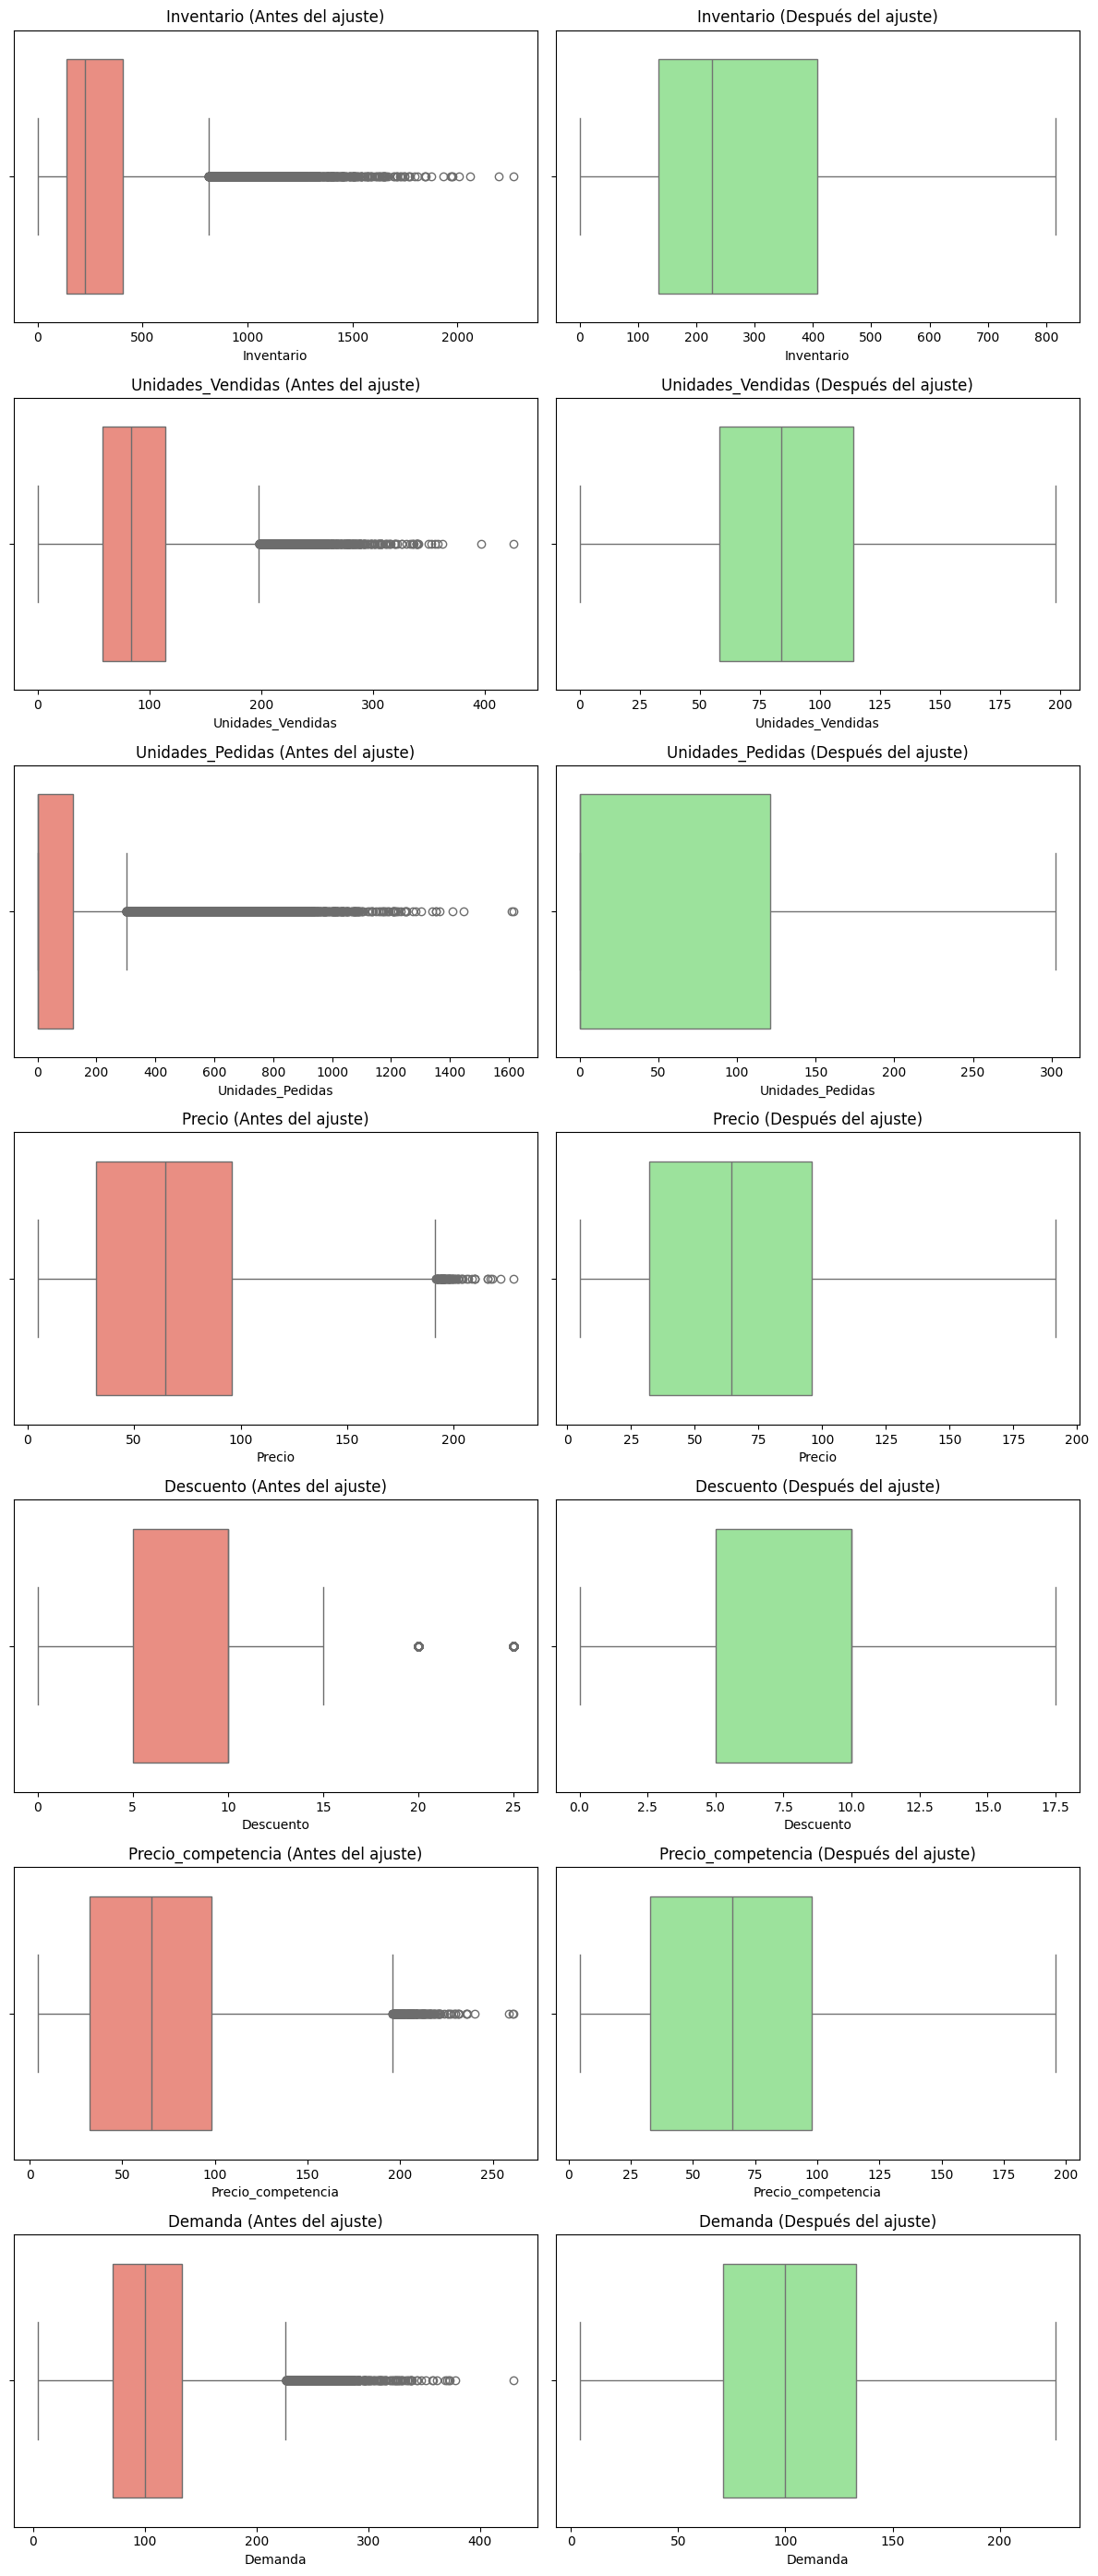

In [19]:
#1. Grafico para comparar los outliers antes y después del ajuste
df_original = pd.read_excel("/content/Data_Ventas.xlsx")

# Lista de columnas numéricas a visualizar
columnas = [
    'Inventario', 'Unidades_Vendidas', 'Unidades_Pedidas',
    'Precio', 'Descuento', 'Precio_competencia', 'Demanda'
]

# Crear figuras lado a lado para comparar
fig, axes = plt.subplots(nrows=len(columnas), ncols=2, figsize=(12, 4 * len(columnas)))

for i, col in enumerate(columnas):
    # Boxplot antes del ajuste
    sns.boxplot(data=df_original, x=col, ax=axes[i, 0], color="salmon")
    axes[i, 0].set_title(f"{col} (Antes del ajuste)")

    # Boxplot después del ajuste
    sns.boxplot(data=df, x=col, ax=axes[i, 1], color="lightgreen")
    axes[i, 1].set_title(f"{col} (Después del ajuste)")

plt.tight_layout()
plt.show()

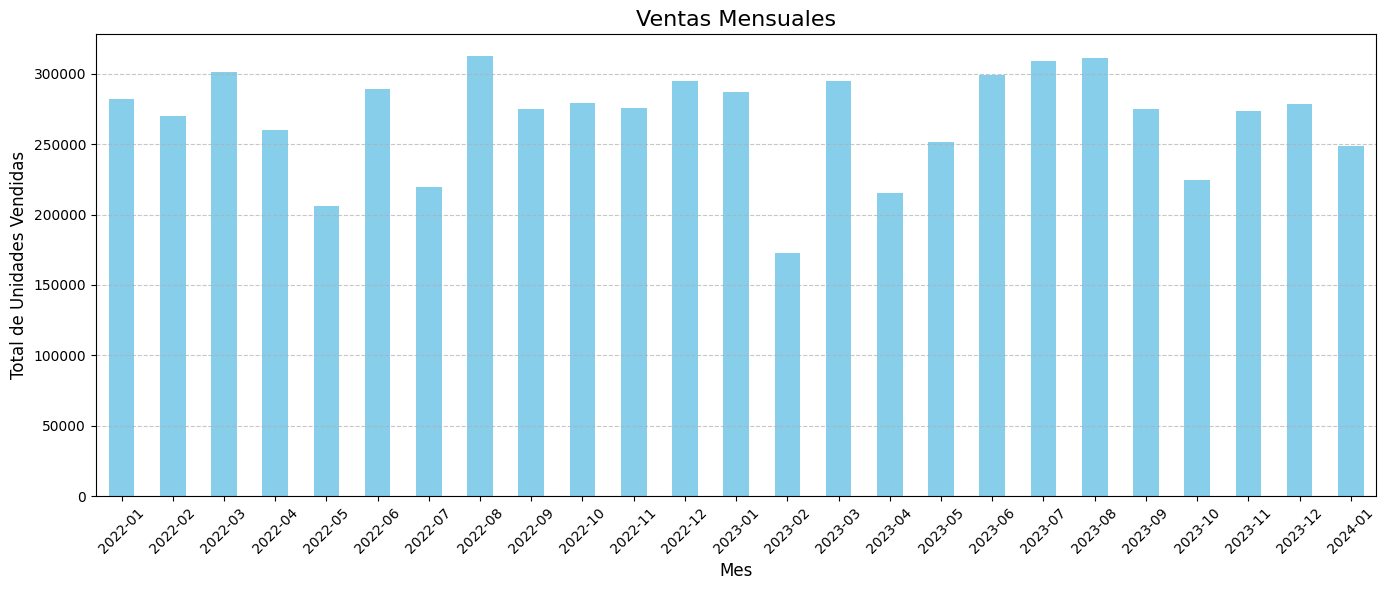

In [20]:
#2. Agrupar ventas por mes

Ventas_Mensuales =df.groupby(df['Fecha'].dt.to_period('M'))['Unidades_Vendidas'].sum()

#Visualización
plt.figure(figsize=(14, 6))
Ventas_Mensuales.plot(kind='bar', color='skyblue')
plt.title('Ventas Mensuales', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Unidades Vendidas', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

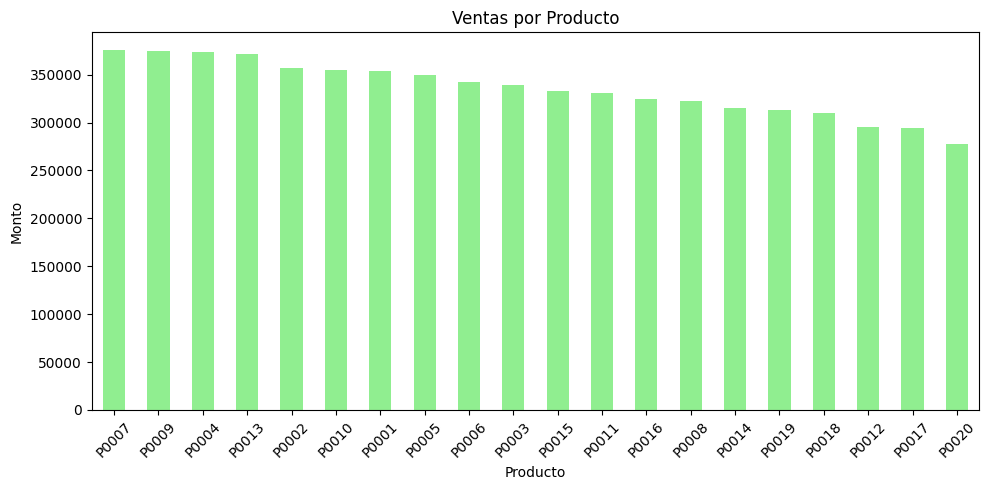

In [21]:
#3. Ventas por producto
Ventas_Producto = df.groupby('ID_Producto')['Unidades_Vendidas'].sum().sort_values(ascending=False)

Ventas_Producto.plot(kind='bar', color='lightgreen', figsize=(10, 5))
plt.title('Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Monto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

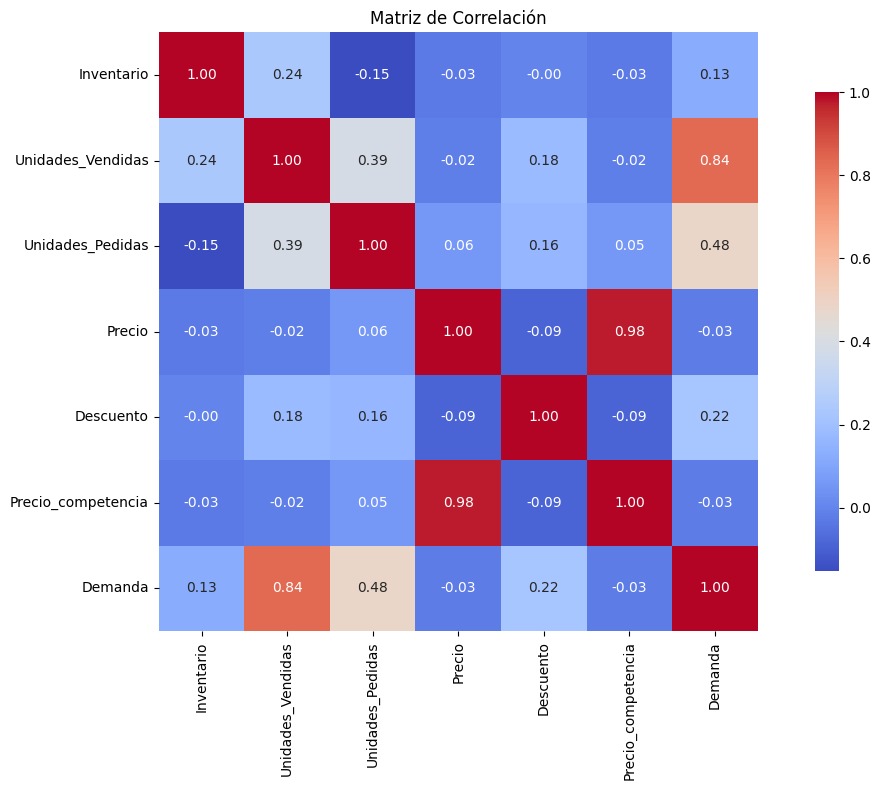

In [22]:
#4. Graficar Correlación entre variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

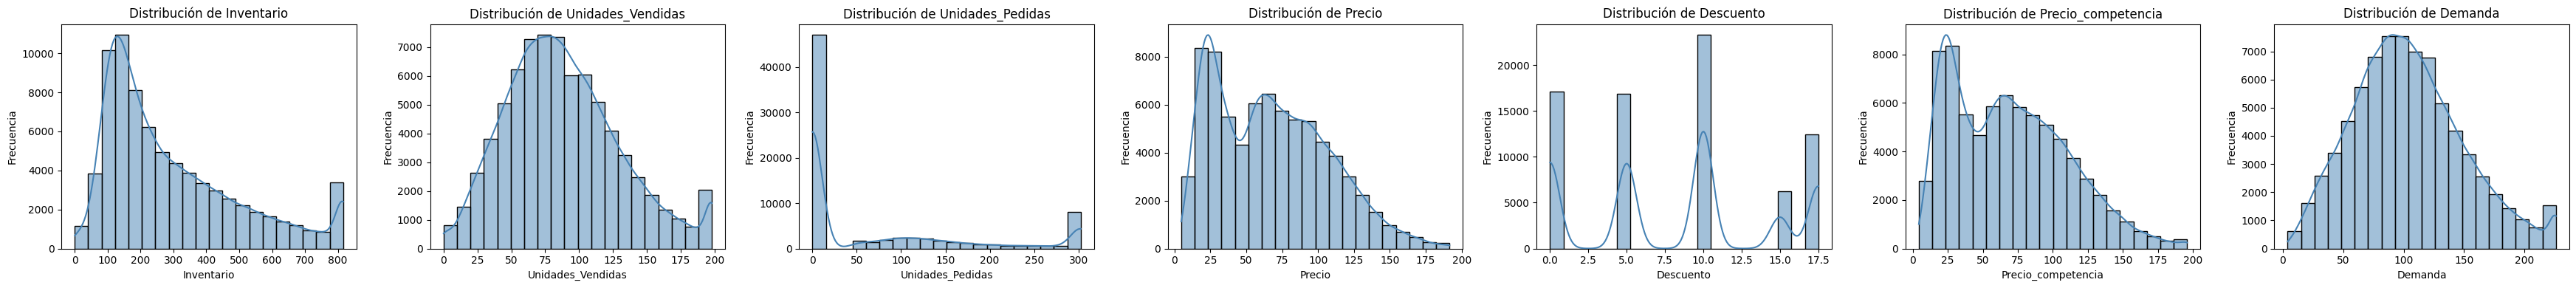

In [23]:
#5. Histograma con KDE para cada variable
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(5 * len(numeric_cols), 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(df[col], bins=20, kde=True, color='steelblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


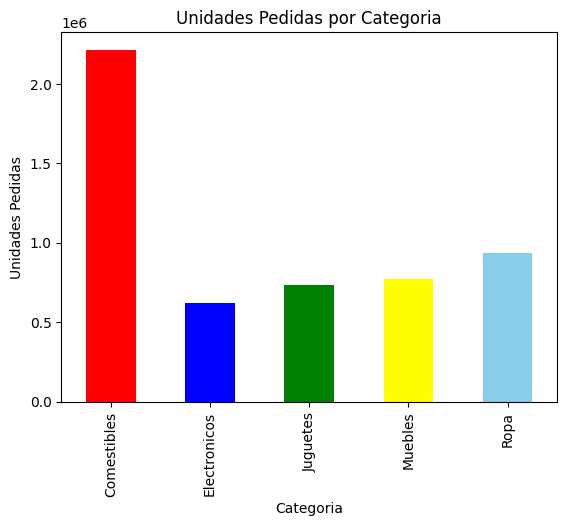

In [24]:
#6. grafico de barras de categoria más vendida
df.groupby('Categoria')['Unidades_Pedidas'].sum().plot(kind='bar', color=['red', 'blue', 'green', 'yellow','skyblue'])
plt.title('Unidades Pedidas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Unidades Pedidas')
plt.show()